In [1]:
import crystal_toolkit
import os
from pymatgen.core import Structure
import matcalc

In [2]:
struct_expt = Structure.from_file(
    os.path.join("cif", "POSCAR_MnZn_1_relaxed")
)

In [3]:
calculator_pbe = matcalc.load_fp("pbe")

phonon_calc = matcalc.PhononCalc( # type: ignore
    calculator_pbe,
    relax_structure=True,
    write_band_structure="output/ZFO0_75_phonon_bs.yaml",
    write_total_dos="output/ZFO0_75_phonon_dos.dat",
    write_phonon="output/ZFO0_75_phonon.yaml",
    optimizer="FIRE",
)

final_structure_pbe =struct_expt

data_ZFO0_75 = phonon_calc.calc(final_structure_pbe)

c:\Users\Sabbir\miniconda3\envs\matsim\lib\site-packages\ase\filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 5.419157186484621e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
c:\Users\Sabbir\miniconda3\envs\matsim\lib\site-packages\ase\filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 5.47216702011836e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
c:\Users\Sabbir\miniconda3\envs\matsim\lib\site-packages\ase\filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 5.461756715823808e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
c:\Users\Sabbir\miniconda3\envs\matsim\lib\site-packages\ase\filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 5.430499421523785e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
c:\Users\Sabbir\miniconda3\envs\matsim\lib\site-packages\ase\filters.py:606: RuntimeWarni

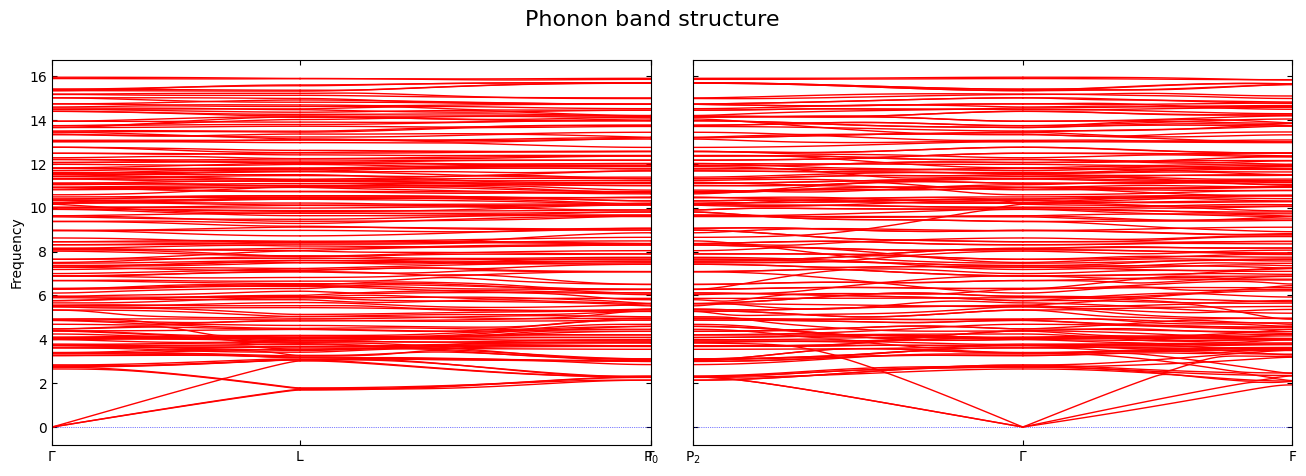

In [4]:
import matplotlib.pyplot as plt

phonon_bs = data_ZFO0_75['phonon'].band_structure

n_axes = sum(1 for c in phonon_bs.path_connections if not c)

fig, axs = plt.subplots(1, n_axes, figsize=(16, 5))

if n_axes == 1:
    axs = [axs]

for ax in axs[1:]:
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelleft=False)

phonon_bs.plot(ax=axs)
fig.suptitle("Phonon band structure", fontsize=16)
plt.subplots_adjust(wspace=0.07)
plt.show()


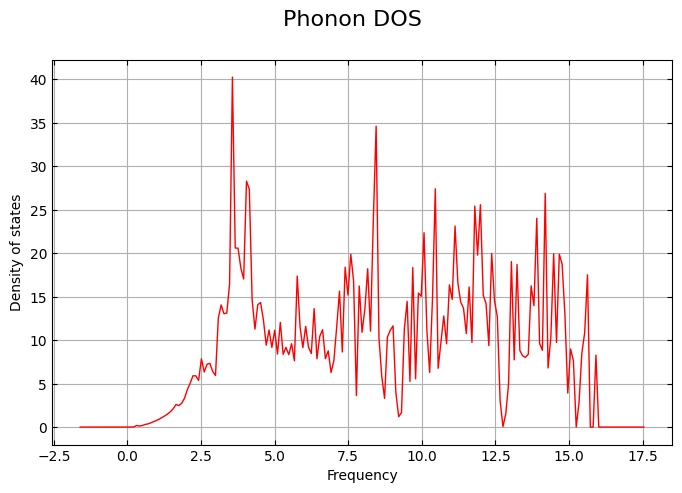

In [5]:
phonon_dos = data_ZFO0_75["phonon"].total_dos

fig, ax = plt.subplots(figsize=(8, 5))
phonon_dos.plot(ax=ax)
fig.suptitle("Phonon DOS", fontsize=16)
plt.show()

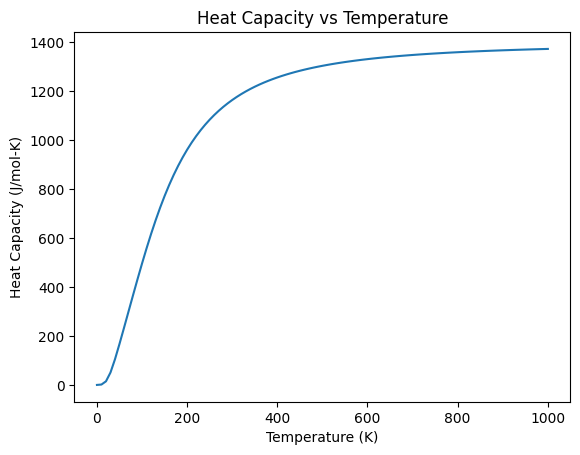

In [6]:
plt.plot(
    data_ZFO0_75['thermal_properties']['temperatures'],
    data_ZFO0_75['thermal_properties']['heat_capacity']
)

plt.xlabel("Temperature (K)")
plt.ylabel('Heat Capacity (J/mol-K)')
plt.title("Heat Capacity vs Temperature")
plt.show()

## r2scan

In [ ]:
## Relax with r2scan

import matcalc

calculator_r2scan = matcalc.load_fp("r2scan")
relax_calc = matcalc.RelaxCalc(
    calculator_r2scan,
    optimizer="FIRE",
    relax_atoms=True,
    relax_cell=True
)

data_r2scan = relax_calc.calc(struct_expt)


In [ ]:
final_structure_r2scan = data_r2scan['final_structure']
print(final_structure_r2scan)
final_structure_r2scan